# Introduction

Space exploration has long been a field that captivates the imagination of scientists, engineers, and the general public alike. Over the past decades, numerous countries and companies have embarked on ambitious missions to explore the vast expanse of space, seeking to push the boundaries of human knowledge and technological capability. The data at hand provides a detailed snapshot of these missions, offering insights into the countries and companies leading the charge, the outcomes of these missions, and the trends that have shaped space exploration over time.

In this analysis, we delve into the distribution of space missions conducted by key players such as the United States, China, the Russian Federation, and France. By examining the frequency and outcomes of these missions, we aim to uncover patterns that reveal the success rates, challenges, and strategic focuses of these space-faring nations and their respective companies. The data also allows us to explore how different companies within these countries contribute to the overall mission success, shedding light on the critical role of corporate entities in advancing space exploration.

Through this exploration, we seek to provide a comprehensive understanding of the current landscape of space missions, highlighting both the achievements and the risks associated with this highly complex and competitive field. This analysis not only reflects on the past and present state of space exploration but also sets the stage for considering future trends and developments in this ever-evolving arena.

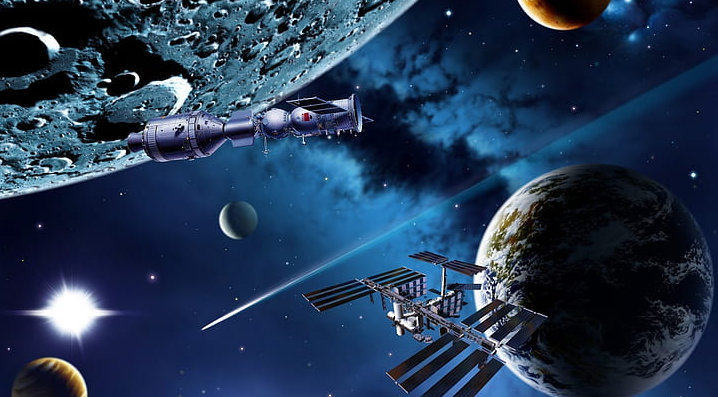

# Column Description

1. **Unnamed: 0.1 (int64)**: 
   Appears to be an automatically generated index column. This might be a duplicate or an unnecessary artifact from data processing.

2. **Unnamed: 0 (int64)**: 
   Similar to Unnamed: 0.1, this column is likely another index or row identifier, which may be redundant.

3. **Company Name (object)**: 
   Contains the names of companies involved in space missions. This column has 56 unique entries, with companies such as "RVSN USSR" being the most frequently listed. It provides insights into which organizations are most active in space missions.

4. **Location (object)**: 
   Records the geographical location of each space launch. With 137 unique locations, this column helps identify key spaceports and launch sites globally, such as Baikonur Cosmodrome in Kazakhstan, which is one of the most frequently mentioned sites.

5. **Datum (object)**: 
   Represents the date and time of each mission launch, with 4319 unique timestamps. This column is crucial for analyzing trends over time, identifying peak periods for space launches, and correlating with other time-dependent data.

6. **Detail (object)**: 
   Provides specific information about each mission, including the type of rocket, payload, and mission objectives. With 4278 unique entries, this column offers detailed insights into the technical and operational aspects of each space launch.

7. **Status Rocket (object)**: 
   Indicates the operational status of the rocket used in the mission, with two possible statuses (e.g., active or retired). This column helps track the lifecycle and reuse of rockets across different missions.

8. **Rocket (object)**: 
   Contains information related to the specific rockets used in the missions, with 56 unique entries. This column can be used to analyze the performance, frequency, and success rate of different rocket models.

9. **Status Mission (object)**: 
   Reflects the outcome of the mission, with four unique statuses such as success, failure, partial success, etc. This column is essential for assessing the reliability and success rate of space missions.


In [1]:
!pip install iso3166

## Python Libraries

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from iso3166 import countries

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/all-space-missions-from-1957/Space_Corrected.csv


## Read and Analyze Dataset

In [3]:
df=pd.read_csv("/kaggle/input/all-space-missions-from-1957/Space_Corrected.csv")

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [5]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    4324 non-null   object
 1   Location        4324 non-null   object
 2   Datum           4324 non-null   object
 3   Detail          4324 non-null   object
 4   Status Rocket   4324 non-null   object
 5    Rocket         964 non-null    object
 6   Status Mission  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


In [7]:
df.describe()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


## Number of Launches by Every Company


In [8]:
ds = df["Company Name"].value_counts().reset_index()[:20]

In [9]:
# Create a space-themed bar chart using Plotly
fig = go.Figure(go.Bar(
    x=ds["Company Name"],
    y=ds["count"],
    marker=dict(
        color=ds["count"],
        colorscale="Portland",  # More vibrant colors for better visibility
        colorbar=dict(title="Launches", titlefont=dict(color="white"), tickfont=dict(color="white"))  # Space-themed colorbar
    ),
    text=ds["count"],  # Adding the number of launches as labels on the bars
    textposition='auto',
    hoverlabel=dict(bgcolor="black", font_size=12, font_family="Arial", font_color="white")  # Space-themed hover labels
))

# Update the layout with a space-themed design
fig.update_layout(
    title="Number of Launches by Each Company",
    titlefont=dict(color="white"),
    xaxis_title="Company Name",
    xaxis=dict(tickangle=-45, titlefont=dict(color="white"), tickfont=dict(color="white")),
    yaxis_title="Number of Launches",
    yaxis=dict(titlefont=dict(color="white"), tickfont=dict(color="white")),
    hovermode="x",
    template="plotly_dark",  # Dark theme for a space-like atmosphere
    paper_bgcolor="rgb(10, 10, 25)",  # Dark navy blue to mimic deep space
    plot_bgcolor="rgb(10, 10, 25)",   # Same background color for the plot area
    margin=dict(l=40, r=40, t=40, b=40),  # Adjusting margins for better spacing
    shapes=[  # Adding a subtle star pattern in the background
        dict(
            type="circle",
            xref="paper", yref="paper",
            x0=0.1, y0=0.1, x1=0.13, y1=0.13,
            fillcolor="white",
            opacity=0.3,
            line=dict(width=0)
        ),
        dict(
            type="circle",
            xref="paper", yref="paper",
            x0=0.7, y0=0.3, x1=0.73, y1=0.33,
            fillcolor="white",
            opacity=0.3,
            line=dict(width=0)
        )
    ]
)

# Display the chart
fig.show()

## Rocket Status

In [10]:
# Create a DataFrame by counting the values in the Status Rocket column
ds = df["Status Rocket"].value_counts().reset_index()
ds.columns = ["Rocket Status", "Count"]  # Rename columns for clarity

# Create a pie chart, adjusting the colors as requested
fig = px.pie(
    ds, 
    values="Count", 
    names="Rocket Status", 
    title="Rocket Status",
    color_discrete_sequence=["#6495ED", "#E6E6FA"]  # Blue for StatusRetired, Lilac for StatusActive
)

# Update the traces for better visibility and style
fig.update_traces(
    hoverinfo="label+percent",  # Show both label and percentage on hover
    textinfo="value+percent",  # Show both value and percentage on the slices
    textfont_size=15,
    marker=dict(line=dict(color="white", width=2))  # White lines between slices
)

# Update the layout to improve readability and style
fig.update_layout(
    title_font=dict(size=20, color="white"),  # Title font size and color
    paper_bgcolor="rgb(75, 0, 130)",  # Lighter purple background color
    plot_bgcolor="rgb(75, 0, 130)",   # Same color for plot background
    annotations=[dict(text="Rocket Status", x=0.5, y=0.5, font_size=15, showarrow=False, font_color="white")],  # Center title annotation
    legend=dict(
        font=dict(size=12, color="white"),  # Legend text color and size adjustment
        orientation="h",  # Horizontal legend orientation
        xanchor="center",  # Center the legend horizontally
        x=0.5,  # Position the legend in the center horizontally
        yanchor="bottom",  # Anchor the legend to the bottom
        y=1.02  # Move the legend closer to the chart
    ),
    margin=dict(l=40, r=40, t=40, b=40),  # Adjust the margin to make the chart smaller
    width=600,  # Reduce the width of the chart
    height=400  # Reduce the height of the chart
)

fig.show()

## Mission Status

In [11]:
# Count the top 3 most common mission statuses
ds = df["Status Mission"].value_counts().reset_index()[:3]
ds.columns = ["Mission Status", "Count"]  # Rename columns for clarity

# Define a color map for mission statuses
color_map = {
    "Success": "green",  # Green for success
    "Failure": "red",    # Red for failure
    "Partial Failure": "orange"  # Orange for partial failures
}

# Create a bar chart to display the mission status counts with custom colors
fig = px.bar(
    ds, 
    x="Mission Status", 
    y="Count", 
    title="Mission Status",
    color="Mission Status",  # Color the bars based on mission status
    color_discrete_map=color_map  # Apply the custom color map
)

# Update the layout for a more polished appearance
fig.update_layout(
    title_font=dict(size=20, color="black"),  # Set title font size and color
    xaxis_title="Mission Status",  # Label for x-axis
    yaxis_title="Count",  # Label for y-axis
    plot_bgcolor="rgb(230, 230, 250)",  # Light background color for the plot area
    paper_bgcolor="rgb(230, 230, 250)",  # Light background color for the entire figure
    font=dict(color="black"),  # Set font color for the entire figure
    margin=dict(l=40, r=40, t=40, b=40),  # Adjust margins for spacing
    width=600,  # Set figure width
    height=400  # Set figure height
)

fig.show()

## Rocket Cost Distribution with Rocket Status

In [12]:
np.sum(pd.isna(df.loc[:," Rocket"]))

3360

In [13]:
df_ = df.dropna(subset=[" Rocket"], axis = "rows")
len(df_)

964

In [14]:
df_.loc[:, " Rocket"]

0        50.0 
1       29.75 
3        65.0 
4       145.0 
5       64.68 
         ...  
3855     59.0 
3971    63.23 
3993    63.23 
4000    63.23 
4020    63.23 
Name:  Rocket, Length: 964, dtype: object

In [15]:
df_.loc[:, " Rocket"] = df_.loc[:, " Rocket"].fillna(0.0).str.replace(",","")
df_.loc[:, " Rocket"] = df_.loc[:, " Rocket"].astype(np.float64).fillna(0.0)

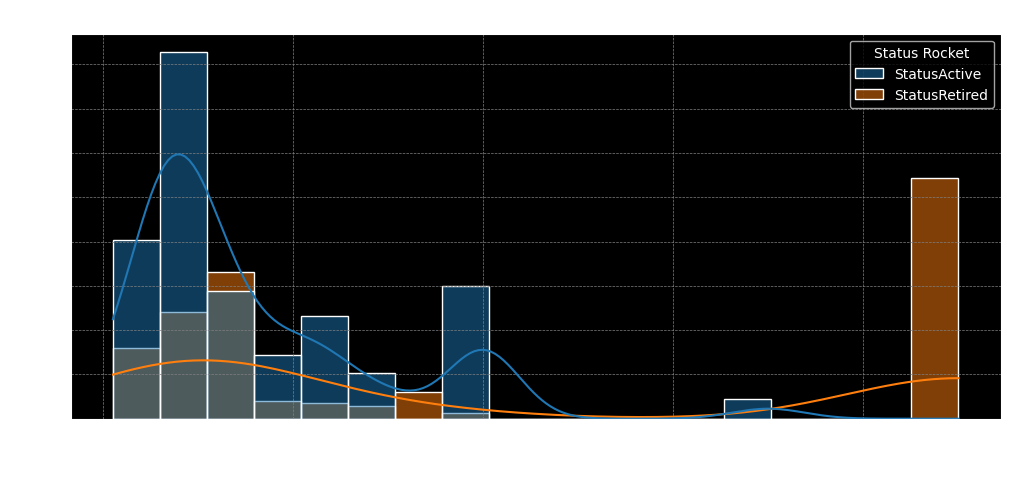

In [16]:
# Filter the data to include only rows where "Rocket" values are less than 1000
df_d = df_[df_.loc[:, " Rocket"] < 1000]

# Set a space-themed figure size and style
plt.figure(figsize=(12, 5))  # Smaller figure size

# Set a dark background for a space theme
plt.style.use("dark_background")

# Plot a histogram with "Status Rocket" as the hue, using a space-themed color palette
sns.histplot(data=df_d, x=" Rocket", hue="Status Rocket", kde=True, palette=["#1f77b4", "#ff7f0e"], edgecolor="white")

# Add title and axis labels with space-themed colors
plt.title("Distribution of Rocket Values Less Than 1000", fontsize=16, color="white")
plt.xlabel("Rocket Value", fontsize=14, color="white")
plt.ylabel("Frequency", fontsize=14, color="white")

# Set the x and y axis tick label colors to white for visibility
plt.xticks(color="white")
plt.yticks(color="white")

# Customize the grid and spines to match the space theme
plt.grid(True, color="gray", linestyle="--", linewidth=0.5)
plt.gca().spines["top"].set_color("white")
plt.gca().spines["right"].set_color("white")
plt.gca().spines["left"].set_color("white")
plt.gca().spines["bottom"].set_color("white")

# Display the plot
plt.show()

## Rocket Cost Distribution with Mission Status

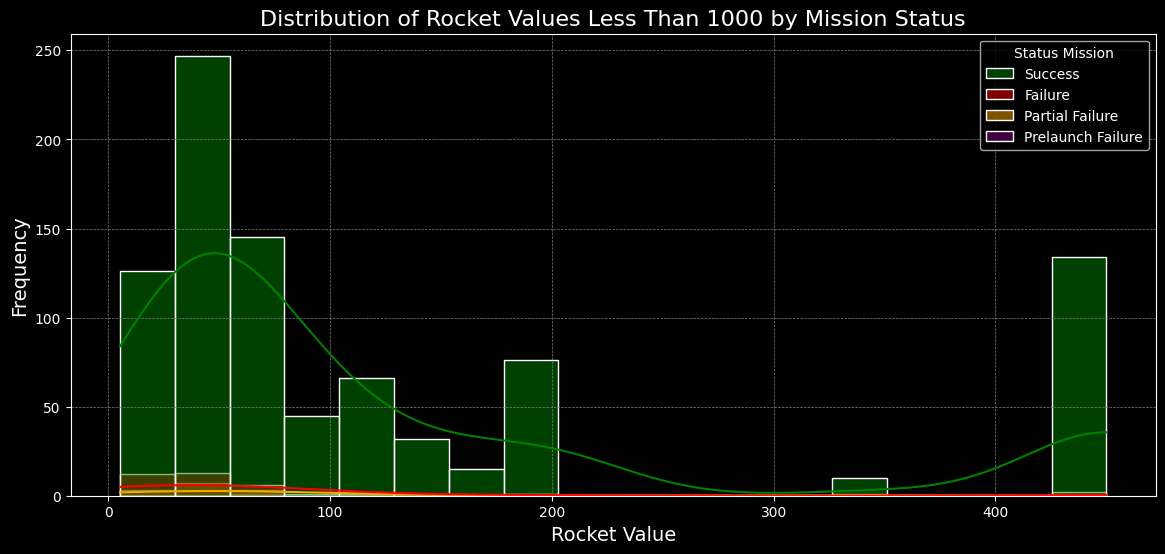

In [17]:
# Set a space-themed figure size and style
plt.figure(figsize=(14, 6))  # Adjust the figure size to be more compact

# Set a dark background for a space theme
plt.style.use("dark_background")

# Define a complete color palette for all possible mission statuses
palette = {
    "Success": "green", 
    "Failure": "red", 
    "Partial Failure": "orange",
    "Prelaunch Failure": "purple"  # Assign a color for Prelaunch Failure
}

# Plot a histogram with "Status Mission" as the hue, using the complete color palette
sns.histplot(data=df_d, x=" Rocket", hue="Status Mission", kde=True, palette=palette, edgecolor="white")

# Add title and axis labels with space-themed colors
plt.title("Distribution of Rocket Values Less Than 1000 by Mission Status", fontsize=16, color="white")
plt.xlabel("Rocket Value", fontsize=14, color="white")
plt.ylabel("Frequency", fontsize=14, color="white")

# Set the x and y axis tick label colors to white for visibility
plt.xticks(color="white")
plt.yticks(color="white")

# Customize the grid and spines to match the space theme
plt.grid(True, color="gray", linestyle="--", linewidth=0.5)
plt.gca().spines["top"].set_color("white")
plt.gca().spines["right"].set_color("white")
plt.gca().spines["left"].set_color("white")
plt.gca().spines["bottom"].set_color("white")

# Display the plot
plt.show()

## Total Spent Money for each Companies

In [18]:
df_.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


In [19]:
df_money = df_.groupby(["Company Name"])[" Rocket"].sum().reset_index()
df_money = df_money[df_money[" Rocket"] > 0]
df_money.head()

,Company Name,Rocket
0,Arianespace,16345.0
1,Boeing,1241.0
2,CASC,6340.26
3,EER,20.0
4,ESA,37.0


In [20]:
df_money_ = df_money.sort_values(by = [" Rocket"], ascending = False)[:15]
df_money_.head()

,Company Name,Rocket
14,NASA,76280.0
0,Arianespace,16345.0
21,ULA,14798.0
16,RVSN USSR,10000.0
2,CASC,6340.26


In [21]:
# Round the "Rocket" values to remove decimal places
df_money_[" Rocket"] = df_money_[" Rocket"].round(0)

# Create a bar chart to display the total spent money for each company
fig = px.bar(
    df_money_, 
    x="Company Name", 
    y=" Rocket", 
    title="Total Spent Money for Each Company",
    labels={" Rocket": "Total Spent Money", "Company Name": "Company Name"},  # Label customization
    color_discrete_sequence=px.colors.qualitative.Safe  # Use a qualitative color scheme without the color bar
)

# Update the layout for a more polished appearance
fig.update_layout(
    title_font=dict(size=20, color="black"),  # Set title font size and color
    xaxis_title="Company Name",  # Label for x-axis
    yaxis_title="Total Spent Money",  # Label for y-axis
    plot_bgcolor="rgb(230, 230, 250)",  # Light background color for the plot area
    paper_bgcolor="rgb(230, 230, 250)",  # Light background color for the entire figure
    font=dict(color="black"),  # Set font color for the entire figure
    margin=dict(l=40, r=40, t=40, b=40),  # Adjust margins for spacing
    width=800,  # Set figure width
    height=500  # Set figure height
)

# Display the plot without a color bar
fig.show()

## Mission Numbers by Year

In [22]:
# Attempt to convert the "Datum" column to datetime using a specific format
df["date"] = pd.to_datetime(df["Datum"], format="%a %b %d, %Y", errors='coerce')
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,date
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,NaT
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,NaT
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,NaT
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,NaT
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,NaT


In [23]:
df["year"] = df["date"].apply(lambda datetime: datetime.year)
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,date,year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,NaT,NaN
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,NaT,NaN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,NaT,NaN
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,NaT,NaN
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,NaT,NaN


In [24]:
ds = df["year"].value_counts().reset_index()

In [25]:
import plotly.express as px

# Create a scatter plot to display the number of missions by year
fig = px.scatter(ds, x="year", y="count", title="Missions Number by Year", size="count", color="count")

# Update the layout for a more polished appearance
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Number of Missions",
    title_font=dict(size=20),
    width=800,
    height=500
)

# Display the plot
fig.show()

## Countries and Mission Status

In [26]:
from sklearn.preprocessing import LabelEncoder

# Encode the "Status Mission" column
encoder = LabelEncoder()
df["Status_Mission_Encoded"] = encoder.fit_transform(df["Status Mission"])

# Define the color mapping based on the encoded values
colors = {0: "red", 
          1: "Orange", 
          2: "Yellow", 
          3: "Green"}

# Define a dictionary to normalize country names
countries_dict = {
    'Russia' : 'Russian Federation',
    'New Mexico' : 'USA',
    "Yellow Sea": 'China',
    "Shahrud Missile Test Site": "Iran",
    "Pacific Missile Range Facility": 'USA',
    "Barents Sea": 'Russian Federation',
    "Gran Canaria": 'USA'
}

# Extract country names from "Location" and replace them with normalized values
df["country"] = df["Location"].str.split(", ").str[-1].replace(countries_dict)

# Display the first few rows to check the transformations
df.head()


,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,date,year,Status_Mission_Encoded,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,NaT,NaN,3,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,NaT,NaN,3,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,NaT,NaN,3,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,NaT,NaN,3,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,NaT,NaN,3,USA


In [27]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create subplots
fig = make_subplots(rows=4, cols=4, subplot_titles=df["country"].unique())

# Iterate over each unique country to create individual bar plots
for i, country in enumerate(df["country"].unique()):
    counts = df[df["country"] == country]["Status Mission"].value_counts(normalize=True) * 100
    color = [colors[encoder.transform([x])[0]] for x in counts.index]
    trace = go.Bar(x=counts.index, y=counts.values, name=country, marker={"color": color}, showlegend=False)
    fig.add_trace(trace, row=(i // 4) + 1, col=(i % 4) + 1)

# Update layout settings
fig.update_layout(title={"text": "Countries and Mission Status"}, height=1000, width=1100)

# Update Y-axis title for each row
for i in range(1, 5):
    fig.update_yaxes(title_text="Percentage", row=i, col=1)

# Display the plot
fig.show()

## Sunburst Chart

In [28]:
sun = df.groupby(["country","Company Name","Status Mission"])["Datum"].count().reset_index()

sun = sun[(sun.country == "USA") | (sun.country == "China") | (sun.country == "Russian Federation") | (sun.country == "France")]
sun.head()

,country,Company Name,Status Mission,Datum
7,China,CASC,Failure,14
8,China,CASC,Partial Failure,6
9,China,CASC,Success,231
10,China,CASIC,Failure,2
11,China,CASIC,Success,3


In [29]:
import plotly.express as px

# Create a Sunburst chart with customized colors and improved hover information
fig = px.sunburst(
    sun,
    path=["country", "Company Name", "Status Mission"],
    values="Datum",
    color="country",  # Color by country to distinguish different regions
    hover_data={"Datum": True, "country": True, "Company Name": True, "Status Mission": True},
    title="Sunburst Chart for Selected Countries"
)

# Update layout to enhance appearance
fig.update_layout(
    title_font=dict(size=24, color="darkblue"),
    title_x=0.5,  # Center the title
    width=800,  # Adjust the width of the chart
    height=800,  # Adjust the height of the chart
    margin=dict(t=50, l=25, r=25, b=25)  # Set margins for better spacing
)

# Improve the hover template for more detailed information
fig.update_traces(
    hovertemplate="<b>%{label}</b><br>Datum: %{value}<br>Status Mission: %{parent}<br>Country: %{root}"
)

# Display the plot
fig.show()

## Conclusion

The data analysis reveals several key insights into the space missions conducted by various countries and companies. The Sunburst chart highlights that the United States, China, the Russian Federation, and France are the primary contributors to space missions. Among these, the United States leads in the number of missions, showcasing its dominant role in space exploration.

The distribution of mission outcomes varies significantly across countries and companies. Successful missions dominate, particularly in leading space-faring nations like the USA and Russia. However, there are notable instances of failures and partial failures, which highlight the inherent risks and challenges in space exploration.

Furthermore, the analysis of mission statuses across different companies within these countries shows that a handful of companies are responsible for the majority of missions. This concentration indicates the reliance on a few major players in the space industry, reflecting both the high barriers to entry and the specialized expertise required in this field.

Overall, the data underscores the global nature of space exploration, with a few key countries and companies driving the majority of missions. The findings provide a comprehensive overview of the current landscape of space missions, indicating areas of success as well as potential risks that need to be mitigated for future endeavors.